In [4]:
import sys 
sys.path.append("OPM_lab")

import numpy as np
import matplotlib.pyplot as plt

from OPM_lab.sensor_locations import HelmetTemplate, FL_alpha1_helmet



In [5]:
def make_sensor_reference_layout(template:HelmetTemplate, channel_names, Z):
    """
    Create a sensor reference layout based on a helmet template and specified channels.

    Args:
        template (HelmetTemplate): The helmet template containing sensor information.
        channel_names (list of str): Names of the locations actually used for the sensors.
        Z (list of numeric): The z measurements of the channels used.

    Returns:
        OPMSensorLayout: The layout of the OPM sensors.
    """
    assert len(channel_names) == len(Z)

    # get indices of the channels used in the helmet template
    idx = [i for i, template_sens in enumerate(template.label) if template_sens in channel_names]
    template_pos = template.chan_pos[idx]
    template_ori = template.chan_ori[idx]

    print(template_pos)
    print(template_ori)

    # move the template_pos z in template ori to get the OPM pos

    # return OPMSensorLayout(OPM_ori, OPM_pos, channel_names)


make_sensor_reference_layout(FL_alpha1_helmet, channel_names= ["FL3", "FL10", "FL16"], Z = [0.03, 0.05, 0.01])


[[-0.03950802  0.12987231  0.00702394]
 [-0.06269032  0.1108322  -0.00455   ]
 [-0.08264246  0.08189714 -0.01993   ]]
[[-0.51169002  0.85434997  0.09093   ]
 [-0.74603999  0.66589999  0.        ]
 [-0.89486998  0.44633001  0.        ]]


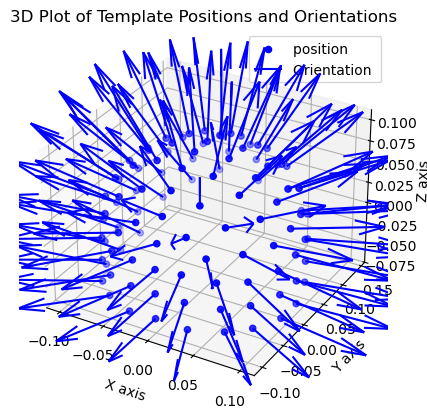

In [10]:


def plot_pos_ori(pos, ori, ax, label = "", c = "b"):

    # Plot positions
    ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2], color=c, label=f'position {label}')

    # Plot orientations as arrows
    for i in range(len(pos)):
        x, y, z = pos[i]
        u, v, w = ori[i]
        
        ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True, color=c, label=f'Orientation {label}' if i == 0 else "")
        # Simple representation of orientation using arrows (may need adjustments based on actual orientation representation)
        #ax.quiver(x, y, z, np.cos(yaw), np.sin(yaw), 0, length=0.02, color=c, label=f'Orientation {label}' if i == 0 else "")


%matplotlib inline 
idx = [2, 3, 4]
template_pos_before = FL_alpha1_helmet.chan_pos
template_ori_before = FL_alpha1_helmet.chan_ori

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


plot_pos_ori(template_pos_before, template_ori_before, ax)

# ADD PLOTTING AFTER!!!

# Labels and legend
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()

plt.title('3D Plot of Template Positions and Orientations')
plt.show()